## Importacion de Librerias

In [6]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot  as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

## Importacion del Modelo

In [7]:
model= load_model("best_model.keras")

## Carga Desde el DataSet

 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step

c:\Users\jesus\OneDrive\Escritorio\Education\Samsung Inovation Campus\Clases\Asignaciones\Semana 7\Quizz\pandas_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


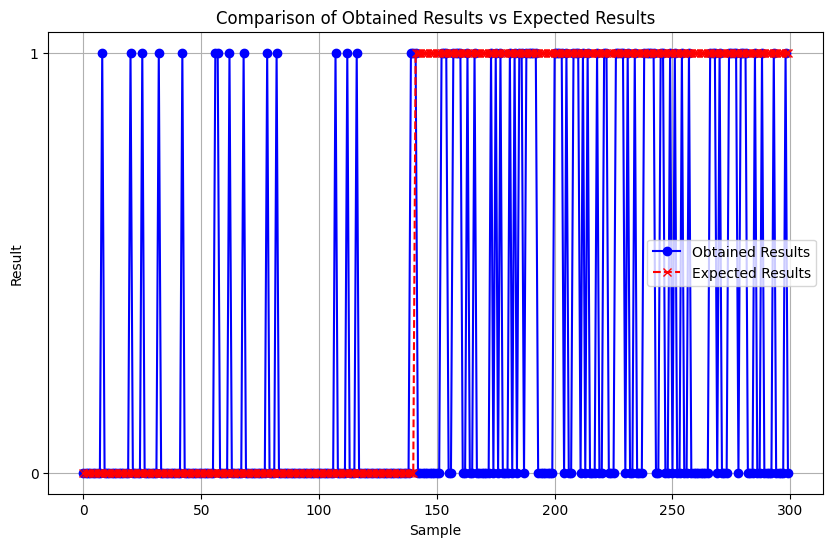

In [8]:
# Cargar los datos
training_df = pd.read_csv('Training Records.csv')
testing_df = pd.read_csv('Test Records.csv')

# Escalado de entradas utilizando los datos de entrenamiento
scaler = StandardScaler()
scaler.fit(training_df[['ph', 'Hardness', 'Solids','Chloramines','Sulfate','Conductivity', 'Organic_carbon','Trihalomethanes','Turbidity']])

# Transformar los datos de prueba
input_data = testing_df[['ph', 'Hardness', 'Solids','Chloramines','Sulfate','Conductivity', 'Organic_carbon','Trihalomethanes','Turbidity']].to_numpy()
input_data_scaled = scaler.transform(input_data) 

# Predicción
resultado = model.predict(input_data_scaled)
resultado_entero = (resultado >= 0.5).astype(int)

# Obtener los resultados esperados
obtained_results = resultado_entero.tolist()
expected_results = testing_df['Potability'].tolist()

# Crear un DataFrame con los resultados
data = {
    'Obtained Results': obtained_results,
    'Expected Results': expected_results
}
df = pd.DataFrame(data)

# Guardar el DataFrame como JSON
df.to_json('resultados.json', orient='records', lines=True)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(obtained_results, marker='o', linestyle='-', color='b', label='Obtained Results')
plt.plot(expected_results, marker='x', linestyle='--', color='r', label='Expected Results')
plt.title('Comparison of Obtained Results vs Expected Results')
plt.xlabel('Sample')
plt.ylabel('Result')
plt.yticks([0, 1])  # Ensure the y-axis only shows 0 and 1
plt.legend()
plt.grid(True)
plt.show()

## Carga Desde variable

#### Variable

In [4]:
variable = [
    [
        5.368988344377341,
        250.66091599510972,
        15973.686891197172,
        6.4162983065822825,
        277.15193765979086,
        334.81995443651584,
        15.684362016443458,
        44.04038216824285,
        3.737882779977894,
        0,
    ],
    [
        4.016590232603383,
        255.6165687786077,
        28612.266106918007,
        7.340595024194956,
        290.69066132670605,
        442.3851181934442,
        9.305732858145577,
        71.34213154493884,
        4.417134152553989,
        0,
    ],
    [
        7.171924088146052,
        254.1253887500646,
        9959.1350153987,
        4.008584109643412,
        335.56910231011415,
        364.8062731549298,
        11.316645280298758,
        59.35322110637468,
        3.170543086971916,
        0,
    ],
    [
        7.719000805137069,
        196.0075183918524,
        13939.294022009968,
        6.935550714808682,
        345.65366218004084,
        423.20353345406727,
        16.836785518971283,
        89.33864945678346,
        2.8848187710564264,
        0,
    ],
    [
        5.9837312940398855,
        221.557383042121,
        18438.82339460093,
        6.654372296073148,
        316.7789989670846,
        443.5439340412618,
        19.13637872139685,
        53.66182298741667,
        3.849382769796561,
        0,
    ],
    [
        7.732601708635223,
        166.9868253472078,
        18445.74345774687,
        7.172850869666733,
        335.56910231011415,
        453.3856317377736,
        13.11140152306814,
        77.2321269958183,
        3.854993745978746,
        0,
    ],
    [
        8.847880710565029,
        190.70085322501603,
        11705.072281969924,
        6.663397069642296,
        380.59249104930217,
        386.4641507477815,
        16.319104528451362,
        85.6936490771539,
        4.143450991614013,
        0,
    ],
    [
        7.561832947775752,
        170.17515725558684,
        23254.0096194587,
        7.583326752098481,
        328.7026297047232,
        397.5879743330805,
        16.140317275067957,
        66.74678059247348,
        4.03215034240876,
        0,
    ],
    [
        8.75856005645011,
        174.72868612181793,
        25564.76756368057,
        8.070254636949876,
        335.56910231011415,
        371.9151708220489,
        14.94369928304934,
        47.1855657546484,
        4.444375641530267,
        0,
    ],
    [
        7.171924088146052,
        188.44546948007348,
        28791.614416229462,
        8.040356351269018,
        382.0094766356869,
        422.23486057105725,
        10.575690095047603,
        63.235365039068704,
        3.228379217091306,
        0,
    ],
    [
        3.832917408963562,
        218.72383999456605,
        23535.0289007381,
        6.475402064091609,
        352.5058975751752,
        421.1834780149268,
        19.273560508946616,
        58.9036980330163,
        4.768660397450635,
        0,
    ],
    [
        3.730128006866974,
        230.2994554356198,
        16892.895661907474,
        6.997171606989552,
        323.5204705490758,
        456.9057035035981,
        10.342145618690552,
        47.09550576962265,
        4.943032174246396,
        0,
    ],
    [
        5.801571267427695,
        201.8924736726692,
        15327.879723449309,
        6.8606473723156185,
        328.93258536876385,
        281.08503234854834,
        19.81248366998551,
        55.3975636525551,
        4.42537756358649,
        0,
    ],
    [
        3.678431807207628,
        187.4967035632496,
        23103.410444128804,
        7.145144825874952,
        335.56910231011415,
        350.5404796207255,
        10.140068301558983,
        67.45618010905046,
        4.480108576205011,
        0,
    ],
    [
        5.143587480040672,
        180.3826185492308,
        32740.56466119368,
        7.988892566309927,
        328.43743041703715,
        389.24214752706166,
        13.94318281997812,
        65.44852677707456,
        3.0961644901713825,
        0,
    ],
    [
        6.6282561973074925,
        198.8657430258765,
        15911.357508753115,
        7.517905882543813,
        342.0159239506881,
        437.9186252990834,
        15.005741987372405,
        38.845957626109126,
        4.464457184096776,
        0,
    ],
    [
        7.171924088146052,
        196.0835555125884,
        18592.08391958237,
        7.245436362417256,
        321.81403250426115,
        552.8790336670374,
        15.664786169209435,
        81.08082626336086,
        4.762871709109083,
        0,
    ],
    [
        3.1020755653395566,
        198.48865056001767,
        45148.80811766023,
        7.821650422876534,
        324.64407957923544,
        427.2167644660192,
        15.53012277971635,
        54.574254304233314,
        4.2480753693420485,
        0,
    ],
    [
        4.497585145008658,
        193.93651490709837,
        27768.382870133544,
        6.9063478052980125,
        330.4307003631261,
        556.0329223405597,
        22.618411189092,
        81.2658162848684,
        4.965738556348034,
        0,
    ],
    [
        5.584124358081074,
        203.75642576459444,
        29999.98700535768,
        7.213328663165363,
        310.6602841265498,
        366.5581312021816,
        14.18302517343841,
        65.8812708385787,
        3.852731892748421,
        0,
    ],
    [
        7.171924088146052,
        205.0658790565438,
        16034.45369903539,
        7.136008140206206,
        397.4696780705473,
        459.29837847720967,
        19.637892924449037,
        70.05983474092567,
        4.858164685873184,
        0,
    ],
    [
        10.33127327592513,
        166.4597794561198,
        15824.822709011038,
        6.396364451731405,
        361.15617848879424,
        376.1021037638319,
        13.844331102652744,
        52.0573806035065,
        2.67344087146352,
        0,
    ],
    [
        9.13079589890256,
        200.0323482662457,
        28273.603243437527,
        7.497526376826516,
        335.56910231011415,
        453.8735707211663,
        12.860513918176252,
        64.17849389212562,
        3.0257073692803504,
        0,
    ],
    [
        4.618850846633238,
        199.3189129125452,
        27174.68763756465,
        7.2185878551826255,
        371.0568606330706,
        312.2813818387051,
        14.040786579336554,
        65.44852677707456,
        4.322115889209005,
        0,
    ],
    [
        6.931244178141836,
        207.5889534566365,
        24359.47041421294,
        7.222004281417241,
        313.8197130852326,
        477.06297483944144,
        16.495091950906897,
        75.04191395375867,
        4.89795711765109,
        0,
    ],
    [
        5.602158585181398,
        264.57351508085407,
        29860.275777016297,
        7.014528281846648,
        335.56910231011415,
        530.204760125255,
        16.030179980745345,
        29.850948197421545,
        4.067048744823668,
        0,
    ],
    [
        7.520518926663479,
        228.5626114502383,
        22160.81966223421,
        7.473798522937219,
        335.56910231011415,
        545.1466502467048,
        16.460633650129182,
        90.94494369027876,
        4.227765963772117,
        0,
    ],
    [
        5.58246981997149,
        172.33158423726564,
        23512.83795722908,
        8.011316209784852,
        364.4834216194262,
        452.0807653778561,
        16.472044685086985,
        95.04565793385632,
        4.048113258131365,
        0,
    ],
    [
        7.992749619333389,
        193.60913765381545,
        14610.41283216292,
        7.218904024289119,
        332.4687554468501,
        468.6029981020903,
        10.877062198437386,
        67.18134080005805,
        4.062907043028831,
        0,
    ],
    [
        8.210357972710824,
        210.22211215667437,
        22619.239931021333,
        7.567987740013541,
        335.56910231011415,
        361.6143910515657,
        14.650189687465286,
        70.36804879948356,
        3.716663875021242,
        0,
    ],
    [
        9.901930594363924,
        206.74646923922108,
        13180.677800723712,
        5.878834626293839,
        335.56910231011415,
        426.5348074742217,
        14.321873739074704,
        75.4087541254813,
        4.226949553930562,
        0,
    ],
    [
        7.171924088146052,
        191.2586554129844,
        14064.899154832416,
        7.036949296843435,
        361.1549510894291,
        399.8386617026264,
        10.845263529339206,
        35.58299178321919,
        3.732339331231006,
        0,
    ],
    [
        9.405875050804864,
        149.30829657309582,
        27180.057189222098,
        7.867309470788526,
        335.56910231011415,
        398.8062463827533,
        17.364706411850875,
        57.96263689945391,
        4.033733317238236,
        0,
    ],
    [
        9.58789502997377,
        195.837105153128,
        11351.86185617761,
        6.267475696262486,
        366.4289275690143,
        323.79486235142434,
        13.068242100406962,
        37.35308022042619,
        4.666916974276835,
        0,
    ],
    [
        4.633202516472866,
        208.9080360528162,
        29307.12894458043,
        6.125585211067605,
        304.0317762783531,
        456.2148284792014,
        10.817158134503416,
        111.11530965742848,
        4.751858815287916,
        0,
    ],
    [
        6.901111019881917,
        154.47409165832607,
        21103.30318824115,
        7.928700188113949,
        376.0010706778945,
        450.2529740439127,
        14.643306487930204,
        71.32137208851483,
        3.61649834167658,
        0,
    ],
    [
        7.79555762878438,
        136.09067693820538,
        26484.51531637415,
        7.555320481391812,
        426.5000221524479,
        471.41335648522914,
        14.54494839517497,
        51.49119683736107,
        3.629252282459239,
        0,
    ],
    [
        7.171924088146052,
        215.43191943883585,
        19909.938849114144,
        6.902628164684116,
        299.08641790230433,
        371.4829106557067,
        10.766349203052188,
        85.2671816033829,
        4.59253797924015,
        0,
    ],
    [
        0.0,
        214.84614399470732,
        49456.5871084231,
        7.897539036774782,
        335.56910231011415,
        583.4488493097667,
        7.702328207475318,
        77.71289111623837,
        4.928839979650702,
        0,
    ],
    [
        8.398261060278296,
        177.34721366797191,
        18003.257284633095,
        7.39092401712103,
        335.56910231011415,
        498.36537661237526,
        10.351297829521627,
        55.71566022856655,
        2.627862469966988,
        0,
    ],
    [
        6.255149748918091,
        153.6404934497769,
        24316.16333992184,
        8.211595059274757,
        367.3445340402844,
        295.04249226405994,
        12.50366064624518,
        91.27079222907058,
        3.146482535996279,
        0,
    ],
    [
        11.496858885301972,
        186.1252959253385,
        12253.303388605282,
        8.066979900780302,
        325.40934121797244,
        260.53175818559777,
        9.674082913742552,
        68.07392789734237,
        5.005193167286548,
        0,
    ],
    [
        7.171924088146052,
        200.71720655652783,
        40581.48680123331,
        6.759980713834527,
        263.8764707538205,
        283.172007740677,
        14.9153250616626,
        58.87946652704952,
        4.008443471887594,
        0,
    ],
    [
        9.347344621102474,
        201.63283568822908,
        13749.59603662392,
        7.333742136171539,
        322.04466679436683,
        512.4463050206832,
        12.434716127111813,
        43.827118677426654,
        3.615151099257613,
        0,
    ],
    [
        11.62114013448698,
        203.73036790881423,
        15102.237427658583,
        7.81641497645993,
        335.56910231011415,
        447.0452134414225,
        21.63238464934801,
        61.80180430648998,
        3.472067461528145,
        0,
    ],
    [
        10.337670863581334,
        163.2762251750455,
        21820.29587508433,
        7.899520922132126,
        356.1796373224695,
        561.2062376872427,
        14.116323805888156,
        56.193060622785694,
        5.063108914843383,
        0,
    ],
    [
        7.171924088146052,
        196.0517407226027,
        21919.47016261208,
        6.730276517344546,
        359.7013518286503,
        401.7313382997792,
        14.219303301729669,
        77.605726493937,
        3.954964291727349,
        0,
    ],
    [
        5.287982807934926,
        245.02346111649337,
        27733.71309889203,
        7.135063441641857,
        238.8440036875379,
        464.0748499377378,
        13.452179490174672,
        55.64236316952619,
        3.3110340047208244,
        0,
    ],
    [
        7.617524134239115,
        179.59618912885367,
        30308.231180576546,
        6.952616889200849,
        329.4224141796441,
        355.4255317460509,
        13.400759973148922,
        66.22359111562261,
        3.6983173972917056,
        0,
    ],
    [
        7.149124567592087,
        202.58254227278624,
        23158.38909647046,
        6.067812010702551,
        302.00274315475485,
        301.9842395216359,
        17.622594764646465,
        42.29276649944741,
        3.787033414567679,
        0,
    ],
    [
        8.651389726569342,
        154.54694874856483,
        15901.285161146245,
        6.5109801126175775,
        419.2163045218507,
        444.8435840256904,
        14.656725456849529,
        49.51517498938423,
        3.2664097400709085,
        0,
    ],
    [
        5.290004370919174,
        174.73842274732667,
        28697.004827070024,
        8.60678979248583,
        317.0164645744724,
        480.6803917021801,
        13.748302184693216,
        52.4758679517842,
        3.532322498228877,
        0,
    ],
    [
        5.369584180846635,
        170.83519216307448,
        27199.64199265838,
        8.065885726265378,
        376.0556372888353,
        401.83303573343926,
        14.081980959228076,
        81.74022452363799,
        3.3574844355981,
        0,
    ],
    [
        8.74727152353787,
        198.7122280342268,
        30348.24365070316,
        7.324498246853736,
        335.56910231011415,
        333.6392821015578,
        13.866073474892744,
        94.72812878030604,
        4.764707507859535,
        0,
    ],
    [
        8.040392261051977,
        200.63757592628696,
        12999.14480401679,
        6.696355790704156,
        356.8700406041423,
        394.01773247312406,
        11.100406898066524,
        43.62591046091927,
        3.017795963114114,
        0,
    ],
    [
        8.550427814830229,
        206.52256592147037,
        10453.087323267704,
        6.48200928116253,
        326.1254822387365,
        347.82432822189554,
        13.997466157892744,
        42.29053494959566,
        4.903869628421024,
        0,
    ],
    [
        7.739325711303171,
        207.7643262140808,
        30412.37233126128,
        7.813966644039233,
        289.41363611779786,
        273.69713915492014,
        19.113381561303925,
        52.281104276835855,
        3.645785495110913,
        0,
    ],
    [
        7.104594898620113,
        201.6271171590917,
        18093.97216209058,
        8.474123113348943,
        361.6291871075997,
        348.7329370678058,
        8.5824611658241,
        49.38268379310724,
        4.76305799060742,
        0,
    ],
    [
        6.988206154718959,
        144.20953523100556,
        33357.51586288418,
        6.771944512116585,
        335.56910231011415,
        409.0067884769262,
        17.88033173967301,
        54.11178496280427,
        1.8996830017290975,
        0,
    ],
    [
        7.869781869538917,
        184.0661690759395,
        18608.65629705439,
        7.411034745446107,
        335.56910231011415,
        364.5776034677032,
        17.58072562779688,
        0.7379999999999995,
        4.219575577587189,
        0,
    ],
    [
        8.859696040242188,
        194.5564817360987,
        20231.517645479675,
        6.519658507972283,
        332.3499485755732,
        476.2317098188568,
        17.88956925706185,
        52.90907057588464,
        4.575331195431778,
        0,
    ],
    [
        7.397544009543939,
        184.840924899607,
        19797.10854291745,
        8.422000034825615,
        387.1903037447218,
        428.4147839334657,
        13.1434437950669,
        62.33797615381316,
        3.9471378883607935,
        0,
    ],
    [
        5.174896031870469,
        205.519018557588,
        12871.551219887571,
        7.09959894625112,
        365.684400622355,
        501.1939500272533,
        20.55867183292861,
        77.12345732231297,
        3.4450280799498847,
        0,
    ],
    [
        7.171924088146052,
        184.21824468861465,
        32328.538264193838,
        8.381231469207194,
        335.56910231011415,
        452.8902973724083,
        12.167905446211648,
        79.9378458756982,
        5.03749221567298,
        0,
    ],
    [
        5.47098182179818,
        191.8130460025501,
        36435.79351381371,
        7.369649468415711,
        323.1200361720617,
        383.8710546413385,
        15.881381663068964,
        52.765049009659535,
        3.84401987082408,
        0,
    ],
    [
        6.711814601241559,
        232.20642839782244,
        23936.275332312147,
        6.619087921298853,
        335.56910231011415,
        463.51029741803154,
        13.911878892876471,
        78.19089708193282,
        3.41364670316115,
        0,
    ],
    [
        4.933106138281651,
        162.18438167815225,
        27771.08013351939,
        7.757701624509676,
        317.9354106889351,
        493.30406865072496,
        14.261742945207857,
        77.14210380386375,
        1.45,
        0,
    ],
    [
        6.260891633792807,
        188.06180543396917,
        33809.22470073784,
        8.141301159936118,
        341.4980435868673,
        522.3012315577494,
        14.467501195370346,
        47.05015549403313,
        4.3973861916141885,
        0,
    ],
    [
        7.693555234691673,
        224.3930365267601,
        21856.145212583404,
        7.041440296130538,
        275.2719704299378,
        404.8239207884093,
        12.848964664042398,
        63.15490498054588,
        2.7506959054782114,
        0,
    ],
    [
        5.622807134660068,
        194.46323893024805,
        16119.340190397354,
        6.907987009229515,
        336.6482070230618,
        408.4590810069099,
        16.364723814358115,
        76.63118557007769,
        3.9929569014268287,
        0,
    ],
    [
        6.174884306431656,
        193.02796027128704,
        23006.242223252262,
        8.098312326473618,
        340.2533541616699,
        297.1126211262145,
        13.47515848600733,
        78.32522668316622,
        3.623297792732569,
        0,
    ],
    [
        5.039406776379789,
        194.4041704563224,
        19336.608073355797,
        7.194765031466901,
        339.2321258939885,
        515.8071822194082,
        10.728669004117194,
        61.12951711869907,
        3.1269559002913,
        0,
    ],
    [
        7.756939183465604,
        219.57621507293064,
        16478.071433262532,
        6.950541221617701,
        335.56910231011415,
        362.7492199188479,
        13.054671937044134,
        82.10099962266007,
        3.8703388472536906,
        0,
    ],
    [
        9.809996386872031,
        139.11870265383985,
        16819.42317944786,
        7.7919819834792445,
        361.0280385830217,
        438.1792466789875,
        10.951138010235638,
        34.53740890850377,
        5.538200508227339,
        0,
    ],
    [
        8.4795927987054,
        200.7656790297213,
        14901.80814391939,
        7.379506080364964,
        335.56910231011415,
        485.0931670137117,
        16.806346943813253,
        53.13417014300742,
        4.221265968887627,
        0,
    ],
    [
        8.862867931189149,
        181.66539789833823,
        17465.09588584397,
        7.131703512231218,
        356.48189007419467,
        529.0860026368656,
        15.430418183729785,
        60.6066029122686,
        5.758675718947986,
        0,
    ],
    [
        6.15573862424869,
        166.29291954859636,
        30284.494869139427,
        8.995896028440464,
        335.56910231011415,
        351.6267335114938,
        17.404753840472438,
        75.33620666035182,
        3.68597582848833,
        0,
    ],
    [
        7.287286375124328,
        219.6951233348875,
        18085.502817623244,
        6.010568765994018,
        277.32971312716325,
        406.56479354776894,
        16.13676600085148,
        53.67744855356023,
        3.504265054731857,
        0,
    ],
    [
        9.065894193686976,
        164.67480268723185,
        20260.40369215635,
        7.58817501892342,
        304.56753698840583,
        408.9012696246163,
        10.17850005755463,
        84.72310655719829,
        4.2995025459430085,
        0,
    ],
    [
        9.314522391908303,
        203.34164997521336,
        23087.21765865113,
        6.43707052209314,
        297.5667642274756,
        373.0441718548715,
        16.402773463358926,
        79.16345643924538,
        3.092940473017639,
        0,
    ],
    [
        9.759937780953084,
        182.75079990042917,
        19945.368305961947,
        6.719256583023286,
        335.56910231011415,
        343.5969579315956,
        19.863354235104,
        85.70256386355253,
        5.381745881823552,
        0,
    ],
    [
        7.985406393829891,
        200.13469747068572,
        17583.08033488389,
        6.771728798328565,
        296.5698232617678,
        377.58420310561297,
        10.28928812083933,
        66.89074702275413,
        4.752451739071304,
        0,
    ],
    [
        8.108350799116819,
        202.51019413930047,
        26730.19261296361,
        8.395129393209157,
        323.9518054321616,
        368.4549914437797,
        17.337091480230242,
        65.44852677707456,
        4.7533581835009855,
        0,
    ],
    [
        8.24309098646176,
        214.5329901550303,
        29461.023770200525,
        8.315129593993294,
        335.56910231011415,
        514.4900120422469,
        16.301765199882368,
        90.07590857566711,
        3.5507168314887294,
        0,
    ],
    [
        10.289379606190511,
        162.78025206078746,
        18869.212089820558,
        6.906496538174993,
        344.1876100515173,
        585.6795888322865,
        18.85714111400796,
        74.29377873862306,
        3.500166975577911,
        0,
    ],
    [
        3.98903207830178,
        216.07613788740343,
        40175.206091417465,
        7.487422756527908,
        309.80079638709793,
        399.0471808706921,
        11.186738886754938,
        86.95746386587989,
        4.409414175563279,
        0,
    ],
    [
        7.171924088146052,
        209.53169733192868,
        44982.73415473764,
        8.898023977582804,
        335.56910231011415,
        349.38523535374304,
        15.653298701189785,
        65.44852677707456,
        3.832478702926656,
        0,
    ],
    [
        8.519639042501984,
        190.9949573776115,
        14578.96131141724,
        6.60269349542669,
        335.56910231011415,
        498.5335778272165,
        11.316601395800546,
        57.18158786191351,
        3.4272514067406243,
        0,
    ],
    [
        7.171924088146052,
        169.54741070567766,
        20004.733627551104,
        6.43767486900497,
        335.56910231011415,
        349.86503636736944,
        11.332517654853916,
        41.70376599451149,
        3.882003963008942,
        0,
    ],
    [
        7.171924088146052,
        223.37668380202143,
        20992.28167736533,
        7.760408060997079,
        340.3657548885643,
        332.4879934062864,
        18.085384538557832,
        61.01645543470445,
        4.64778224578437,
        0,
    ],
    [
        4.495357678948128,
        234.19191634157005,
        14080.833708523329,
        6.340682430161761,
        296.3142195689081,
        382.4080743898848,
        17.353544583874793,
        59.004349138760425,
        4.962899585062542,
        0,
    ],
    [
        7.171924088146052,
        193.09126005208208,
        17777.100086110448,
        6.087949054255588,
        335.56910231011415,
        543.1149525312113,
        10.717588217980335,
        65.44852677707456,
        3.878664155467921,
        0,
    ],
    [
        5.620533436430034,
        226.987836446292,
        27852.097438661614,
        6.521470834565831,
        309.2280913221311,
        414.061545184682,
        16.93291131675005,
        78.43925128713198,
        3.4394758481933128,
        0,
    ],
    [
        8.552993664768604,
        199.59978435801315,
        10452.724414318913,
        6.587933453781061,
        335.56910231011415,
        316.2575133838311,
        23.042375631311245,
        45.25371470931269,
        3.108673907255499,
        0,
    ],
    [
        7.171924088146052,
        216.2379750148496,
        20886.786562734203,
        7.326370088572682,
        303.49867186042536,
        269.8175391182222,
        15.252780400349536,
        104.68255316175272,
        3.860347610223498,
        0,
    ],
    [
        10.209955798031316,
        148.37923479310555,
        18413.096819986466,
        7.407967233394095,
        390.61901328956753,
        410.56817199963297,
        15.103624344268212,
        89.17848451466801,
        4.112597751648249,
        0,
    ],
    [
        7.171924088146052,
        205.23363448310545,
        21829.27314846263,
        6.677057058644299,
        331.67464974935143,
        338.5677576666739,
        15.566655050606188,
        56.6086789870826,
        2.5456313453594457,
        0,
    ],
    [
        6.588207965322447,
        179.699151482952,
        35263.61239925808,
        7.445343062498885,
        335.56910231011415,
        527.449342027736,
        16.149315171152125,
        81.50346990743404,
        3.972255856460901,
        0,
    ],
    [
        8.558388775285017,
        198.88886776012757,
        8535.40295572258,
        4.7966658362851735,
        321.4034765037299,
        453.5711626270173,
        14.351624496412567,
        74.32620443283511,
        3.9462277186114703,
        0,
    ],
    [
        8.42690635667539,
        159.69025100871997,
        19576.530381129185,
        7.664375220029952,
        344.14513049090107,
        390.6908998189671,
        17.747036803656385,
        53.63150440112333,
        4.244513927400452,
        0,
    ],
    [
        7.207538608272426,
        174.80516800528736,
        15796.3996983279,
        6.954041336732498,
        335.56910231011415,
        555.5962106786567,
        14.171164146051638,
        60.53126977894993,
        4.295189193307992,
        0,
    ],
    [
        10.227689694262509,
        225.91911827974377,
        9546.129215154651,
        5.899676356641535,
        313.98734272068555,
        372.5327524807853,
        15.284291259046825,
        61.25804566099464,
        4.786329820343955,
        0,
    ],
    [
        11.39054310956363,
        145.34193656349512,
        16175.22194412561,
        6.613864679018856,
        335.56910231011415,
        553.4889233335263,
        12.091189308804816,
        69.73623074727017,
        2.2773586319376298,
        0,
    ],
    [
        7.171924088146052,
        199.3830906389212,
        5576.628297064725,
        4.998843662158771,
        341.0883416259164,
        388.2492992614705,
        10.745154263317945,
        50.74747360181868,
        3.216414002404394,
        0,
    ],
    [
        6.580043295312247,
        220.575466415346,
        27668.4857194752,
        6.198069013423888,
        335.56910231011415,
        474.6276911318629,
        11.47022614854052,
        53.50804291517807,
        4.756446279122354,
        0,
    ],
    [
        10.81783107643296,
        141.4883911635551,
        23989.990150725997,
        7.96206646334495,
        389.39289728587903,
        361.63205468222696,
        14.9087253915078,
        57.1645558215944,
        3.5908411283530883,
        0,
    ],
    [
        5.093675134769971,
        251.31377951745836,
        30245.95697484084,
        6.7188296734823965,
        267.0260928274,
        271.63073825352404,
        14.882428188643305,
        70.77840809888028,
        4.552571441876335,
        0,
    ],
    [
        5.26428380172951,
        142.5341263042983,
        25556.05312803757,
        6.600786950950184,
        416.2627986734816,
        443.7592310363813,
        7.491362469561352,
        72.87984777883966,
        5.100239664952599,
        0,
    ],
    [
        7.971298747449369,
        151.03292956434998,
        29827.79396925428,
        7.662153935671093,
        405.8298937913429,
        376.91221168815696,
        19.382739124492105,
        78.16013325556787,
        2.439140008548254,
        0,
    ],
    [
        8.3503510398453,
        239.81600458044133,
        17177.78878280838,
        6.108947365964821,
        272.8447146597404,
        294.8760562690446,
        10.603467049677365,
        62.85274862912924,
        3.507227581181632,
        0,
    ],
    [
        7.171924088146052,
        184.614847643805,
        22289.727086089424,
        7.167404798884858,
        392.4621987043338,
        409.4909989233753,
        12.21558820095703,
        63.90425570636129,
        3.351766902910961,
        0,
    ],
    [
        4.032060533561112,
        200.06797277285767,
        14720.544828979062,
        6.4826786124002345,
        335.56910231011415,
        519.2133703660545,
        16.600777163013504,
        77.2939404960377,
        4.8142350960663,
        0,
    ],
    [
        2.1285314339651724,
        192.696421954902,
        24905.28452100044,
        7.757769765315594,
        383.5198922141514,
        473.5500652595829,
        14.286493235032935,
        56.34782990835943,
        3.842109416766354,
        0,
    ],
    [
        9.842056293598295,
        217.89677245522705,
        6785.145302691251,
        6.028898227810446,
        333.073545745888,
        432.332405574233,
        12.365538069177717,
        45.82200410506449,
        4.179197763329108,
        0,
    ],
    [
        7.664628096551665,
        150.6672096648113,
        33918.04082347813,
        8.74629542154002,
        406.4761192954583,
        436.3356220967888,
        15.21692954481125,
        65.44852677707456,
        3.4874068798248765,
        0,
    ],
    [
        7.171924088146052,
        233.99317189415805,
        27197.3024410022,
        7.29745250363261,
        301.84878612891976,
        490.7661905591799,
        16.022780228681597,
        58.52466717651293,
        3.1983438599807616,
        0,
    ],
    [
        7.260319681766154,
        194.247742095427,
        8127.071253987583,
        6.674031760854139,
        394.55583487077706,
        312.3490170800076,
        16.005021528605027,
        65.02396012790987,
        4.282314756372282,
        0,
    ],
    [
        9.537878628968349,
        200.5575073663755,
        20044.206252319666,
        7.078689514914572,
        303.91934120728524,
        335.5548031990471,
        16.636174009005742,
        71.30902217479439,
        3.0245566409360234,
        0,
    ],
    [
        1.985383359263048,
        216.4800247293341,
        23039.328505396858,
        6.769267636869141,
        344.0142562201914,
        341.07837903416186,
        11.498236895261924,
        78.73344130370165,
        3.923093197436791,
        0,
    ],
    [
        7.24899119805637,
        184.07103372110927,
        33123.44297961029,
        7.186173311070744,
        322.3656611110505,
        345.35657568350507,
        15.164133941054388,
        68.84754399231848,
        4.255979651269639,
        0,
    ],
    [
        6.96820896010586,
        178.21731117902698,
        39995.18627184782,
        8.930688995006285,
        337.06494977222525,
        393.6769575025494,
        14.243373528509892,
        75.37574268576242,
        3.632643889529804,
        0,
    ],
    [
        6.150553015211817,
        212.81937743864663,
        15017.747281118674,
        5.544435529850245,
        319.4949519195244,
        279.44706566597955,
        12.850505624337243,
        75.02879271135131,
        4.810537179481996,
        0,
    ],
    [
        6.300755509276121,
        179.45279245637445,
        25668.198954461957,
        8.931530795516178,
        341.4930241478503,
        458.83540577966994,
        14.062955946663408,
        65.44852677707456,
        5.708111882566888,
        0,
    ],
    [
        6.920799599365547,
        218.0986115912776,
        13477.381585615329,
        5.659837138345091,
        335.56910231011415,
        302.4123743213301,
        11.054578085761875,
        61.93377908786759,
        4.915733469336812,
        0,
    ],
    [
        6.481890279167193,
        179.91971076115584,
        34698.62116044991,
        8.538491677011507,
        338.0123232135529,
        504.397152163848,
        16.40936386733148,
        59.95481516616497,
        5.002360532741289,
        0,
    ],
    [
        7.171924088146052,
        208.931457645234,
        16429.907902459956,
        5.873277067660431,
        310.98563367595887,
        364.9194924218992,
        17.801564959305495,
        107.30634311484064,
        4.454964342104219,
        0,
    ],
    [
        7.309596473979961,
        193.4725961371903,
        19343.149511401392,
        7.664060566570742,
        306.68545533280894,
        426.5619276201299,
        12.84436554595942,
        111.59544769593477,
        4.048202462876381,
        0,
    ],
    [
        5.9672742278667465,
        187.0850839899358,
        30846.585474123283,
        7.281105533226092,
        339.0637148109293,
        323.9626950494488,
        12.651853984752847,
        72.2735904472921,
        3.914543611457913,
        0,
    ],
    [
        8.631270000435086,
        164.37116910453548,
        14880.651798256704,
        7.278263165429877,
        350.951581415931,
        444.1081116537782,
        16.857458789281907,
        58.17786717623098,
        3.64094400316757,
        0,
    ],
    [
        9.1726245193336,
        165.6875477419726,
        11319.10623209237,
        6.6188527588159385,
        372.5547130986511,
        420.4291096371746,
        13.353259273302228,
        72.97405083654003,
        3.686395201554108,
        0,
    ],
    [
        7.171924088146052,
        156.77318079614545,
        23084.066584967768,
        7.269794984577688,
        334.9560998008146,
        378.2538694501863,
        19.247141172980605,
        81.57155401918155,
        5.564901543179248,
        0,
    ],
    [
        3.3376289979634506,
        216.25708651504152,
        42310.82749816953,
        8.130663285052764,
        335.56910231011415,
        352.26407394793955,
        14.0296727368069,
        52.76096070101492,
        3.3001918826882606,
        0,
    ],
    [
        11.449739296302305,
        186.6526477450141,
        12355.344107252762,
        7.065576303430455,
        321.83151256825505,
        503.9641099958293,
        16.282371267239228,
        77.15217275097802,
        5.166903483042415,
        0,
    ],
    [
        6.283678794634559,
        205.3766238408668,
        19905.436547735968,
        7.078344555547338,
        284.20602148145,
        471.9040319656132,
        18.027159728439077,
        64.36260840905938,
        4.480771310094809,
        0,
    ],
    [
        7.171924088146052,
        192.4078763659808,
        25460.3007927854,
        8.23147460968343,
        335.56910231011415,
        465.88395466644624,
        16.657294027037324,
        58.360124909843336,
        3.543696299058859,
        0,
    ],
    [
        8.76176840475976,
        212.42695183704657,
        14168.924869029612,
        6.385732629514457,
        335.56910231011415,
        488.5995473883909,
        12.601801205815434,
        60.23707330742579,
        4.673547854912695,
        0,
    ],
    [
        6.616730690411597,
        195.0969675273444,
        34277.760399691986,
        7.632638507090468,
        335.56910231011415,
        417.4650801708633,
        13.43255667145121,
        47.94593618133298,
        3.622379241574248,
        0,
    ],
    [
        7.734569203344947,
        230.91950587872435,
        21776.594455022525,
        6.908590909878645,
        335.56910231011415,
        395.1149612095268,
        15.033557202270345,
        92.69736884495764,
        3.821455974564911,
        0,
    ],
    [
        6.971577181951132,
        185.90693756838783,
        27959.987873012346,
        7.214510211890976,
        349.7438791134752,
        414.0673542810895,
        19.882916973878764,
        36.17900285842046,
        3.2263485005753423,
        0,
    ],
    [
        4.7091867471804845,
        179.1410182425899,
        22291.418577314333,
        6.774276121115724,
        407.4179772431136,
        371.26484280956873,
        18.18680053696949,
        86.52862722448481,
        3.860083951626073,
        0,
    ],
    [
        5.230003189525934,
        176.71402344076833,
        27971.891806145053,
        7.597980582839567,
        413.9140005224453,
        440.35537377319184,
        14.423614126988523,
        72.83737020556842,
        3.045612105934353,
        0,
    ],
    [
        5.274185389589794,
        227.34018598422625,
        17605.535759032802,
        6.326979503447313,
        358.589902963265,
        489.4345906195336,
        11.199190929652048,
        65.44852677707456,
        4.364426391731812,
        1,
    ],
    [
        8.43344310417292,
        224.8560890465408,
        12833.461241077755,
        6.179495870819559,
        327.5332764554875,
        411.8499494676316,
        17.400425875755047,
        72.91730528459134,
        3.8247341378467112,
        1,
    ],
    [
        6.847863211692964,
        234.9422028892612,
        24456.174888097576,
        5.596240507286585,
        334.87304622000903,
        337.5731511678991,
        9.515292142301746,
        77.29730018591418,
        4.9211957300136175,
        1,
    ],
    [
        7.263545070215379,
        160.44306483140969,
        16129.706923294783,
        8.091014004638305,
        328.4471744701351,
        478.5150811723671,
        12.814835520863769,
        43.59230115628645,
        3.9505297370836048,
        1,
    ],
    [
        6.733266882930834,
        191.3056273822501,
        6193.330562324434,
        7.739771030367339,
        335.56910231011415,
        424.6668217064328,
        20.81134247599164,
        98.36782477531796,
        3.765693648104585,
        1,
    ],
    [
        7.171924088146052,
        258.4472651656338,
        25498.329539880902,
        4.92216687925756,
        341.0395800188736,
        425.7970193068897,
        18.993663252019417,
        67.40067335298797,
        3.691946509639444,
        1,
    ],
    [
        7.171924088146052,
        232.943238340234,
        8729.096217461693,
        5.885992173631767,
        335.56910231011415,
        400.5176611909556,
        8.772738387421612,
        69.72391202595443,
        3.399725616068605,
        1,
    ],
    [
        7.77766536646659,
        233.76157880680097,
        16780.11614682852,
        6.123297466049608,
        323.5380551409755,
        520.2850940450035,
        17.79474067602257,
        60.343890907079,
        4.683334812674568,
        1,
    ],
    [
        6.103731304612343,
        184.32869274587483,
        17977.52564891564,
        7.2755305858207535,
        335.56910231011415,
        334.94973918912626,
        7.655381321204231,
        59.00066631654663,
        3.383048919634983,
        1,
    ],
    [
        6.665774201161871,
        155.7096794097609,
        30610.047900416503,
        8.172548400173357,
        337.1737674114045,
        425.6919559344481,
        15.101532720256046,
        79.78046693757119,
        4.903553219156194,
        1,
    ],
    [
        7.171924088146052,
        215.94069522805705,
        10171.710103327809,
        6.622284288215922,
        335.56910231011415,
        378.3175326624119,
        13.190817815116532,
        82.78535241247388,
        3.757799099489597,
        1,
    ],
    [
        4.959852811105887,
        215.85486927203505,
        9887.830754527777,
        6.954230561602053,
        379.5047314584776,
        527.4796939805289,
        14.326638191120082,
        52.38884926159373,
        3.455044818343884,
        1,
    ],
    [
        6.397905013801276,
        249.96924347628504,
        22057.051786181903,
        4.892716651174616,
        375.4944742675054,
        334.2698796287448,
        14.150363083793138,
        97.03045733687998,
        3.958543451376229,
        1,
    ],
    [
        8.1403444634267,
        153.74817023416347,
        50793.898916874045,
        7.843497716454735,
        306.21895013230574,
        423.4559056800464,
        14.322018870397528,
        65.07660990046965,
        4.362792108070999,
        1,
    ],
    [
        6.8506254182690025,
        232.93119602419344,
        15338.0616411657,
        6.142617971325285,
        335.56910231011415,
        438.3473270723619,
        18.14859493849417,
        81.55160971304564,
        2.593833679642705,
        1,
    ],
    [
        6.714776879687881,
        185.9093028232159,
        34558.40266734972,
        6.554857685167836,
        360.5082369923493,
        303.9682026929872,
        10.226470407286968,
        50.21401088832931,
        4.684853470075885,
        1,
    ],
    [
        4.33711946912069,
        207.3619066463786,
        34355.61842683239,
        6.809153177405537,
        374.07277211083584,
        530.069602099354,
        12.622031757768752,
        44.7503592018025,
        4.401635259788382,
        1,
    ],
    [
        8.433290823974154,
        161.19528295802166,
        15904.243358955971,
        8.423765852502946,
        300.1190003614004,
        479.9959053293017,
        15.303754778234008,
        71.47850077419241,
        3.631542932175278,
        1,
    ],
    [
        7.274212566762742,
        197.66094852031983,
        27198.43259077055,
        7.797840028172333,
        304.84997882356305,
        300.0199103361062,
        14.61160015060949,
        66.60889105705493,
        4.710256299762649,
        1,
    ],
    [
        6.579184951031363,
        186.98686935800453,
        16700.034872558706,
        6.454924771941508,
        379.0407087826762,
        405.2769118788481,
        14.996029476541366,
        62.15231452966896,
        3.813556320666148,
        1,
    ],
    [
        7.171924088146052,
        240.6115166509441,
        20006.22910887966,
        4.907299307429319,
        379.75859394933474,
        327.3055580292028,
        13.2858383815082,
        83.18441418933719,
        3.4531255004247314,
        1,
    ],
    [
        8.651023362891474,
        188.7116365205176,
        13207.860965906144,
        6.834673314493745,
        335.244783435716,
        399.6910675025163,
        10.689364774323622,
        43.95331343463439,
        3.644278971793858,
        1,
    ],
    [
        8.35761299314161,
        163.09825445217052,
        34989.04708052216,
        7.696942683440743,
        317.30168011128416,
        404.4926142301905,
        8.271881619595717,
        67.59815754327194,
        4.366242227773332,
        1,
    ],
    [
        7.171924088146052,
        242.82758823909356,
        29298.07426157908,
        5.853839988244764,
        340.34864524416366,
        463.1151743023253,
        5.426649934563386,
        65.44852677707456,
        3.5225861734964283,
        1,
    ],
    [
        6.658741558086449,
        216.56470196178503,
        25172.58575933561,
        6.785520511774099,
        330.517558442994,
        620.4489634810792,
        19.095091489353933,
        82.24409483132357,
        3.400987615145624,
        1,
    ],
    [
        10.503786538570878,
        125.97518527479444,
        38605.33153004213,
        8.710552503456238,
        335.56910231011415,
        674.4434758802673,
        9.71421973743594,
        51.69789379904905,
        5.370457701027556,
        1,
    ],
    [
        6.332386866369147,
        186.8380279272819,
        23073.063966144608,
        8.082003931853437,
        326.98047591959875,
        233.90796511138964,
        9.64144153860542,
        60.94002777822824,
        5.159001749466259,
        1,
    ],
    [
        7.171924088146052,
        214.5936848829916,
        22038.51162084492,
        6.19962761036146,
        294.24139203227435,
        332.4725420271164,
        18.469528166072905,
        46.04628651587072,
        4.238535197148056,
        1,
    ],
    [
        6.730427772496591,
        183.9152961822356,
        9258.767076148217,
        8.005172947231275,
        345.0719543705598,
        320.66786536144025,
        12.066807991437884,
        56.43748498919986,
        3.961942034758809,
        1,
    ],
    [
        8.297783199991656,
        183.61412123660037,
        20316.42668466925,
        7.108809424689269,
        322.09584868920666,
        295.6539573721195,
        13.503196513197167,
        62.23013405110304,
        4.239220571845264,
        1,
    ],
    [
        6.259267532952487,
        130.3742718610842,
        9734.677103081169,
        10.282328870705385,
        320.3597655205257,
        399.3507088667543,
        10.846787074769397,
        43.42019517432946,
        3.9321419587747375,
        1,
    ],
    [
        8.076126298096359,
        132.6703046985399,
        10816.273366562233,
        9.513269116233849,
        314.9704947186873,
        479.75892351602624,
        14.685851003310688,
        72.63830295082012,
        4.291355257945636,
        1,
    ],
    [
        5.7310421388707296,
        223.70496558825224,
        1351.9069790965912,
        6.496722627942392,
        380.5140788236188,
        620.3046389138948,
        14.672927103066913,
        62.02362962212916,
        3.675807027324031,
        1,
    ],
    [
        6.563356596837224,
        241.28632308244363,
        56320.586979158514,
        5.36555757971842,
        335.56910231011415,
        415.8172189138516,
        11.651929332316117,
        70.63764831162115,
        5.2929501812464,
        1,
    ],
    [
        5.303764336866174,
        231.01878381910217,
        6675.682244593603,
        6.100064295307396,
        388.8020447777728,
        465.83053937185343,
        14.531245248436164,
        77.668020274499,
        4.024520850722231,
        1,
    ],
    [
        7.647871554133575,
        160.77435344616492,
        29000.589711925488,
        7.217409339005042,
        335.56910231011415,
        438.8009607469559,
        13.18250056650038,
        67.09996942968077,
        3.0786727238215774,
        1,
    ],
    [
        7.171924088146052,
        139.16974356873496,
        33784.82622980125,
        9.640520475248032,
        275.3319596291253,
        499.4281331505026,
        13.664485342268506,
        70.36836372182748,
        4.678745035353083,
        1,
    ],
    [
        7.951451170491509,
        185.4217237314824,
        6108.795734261221,
        7.117858564061427,
        344.7956808751977,
        283.8772795417849,
        18.904399251077507,
        85.79975869862395,
        3.886882385706481,
        1,
    ],
    [
        8.832142260904973,
        176.80866080582092,
        12171.024549095238,
        7.4753362078876355,
        321.2576280918061,
        395.3873371419826,
        12.481551520173523,
        65.86718937401743,
        3.9145118853536345,
        1,
    ],
    [
        8.250830009047863,
        184.3851244049376,
        21616.633855183747,
        7.166733690414065,
        305.1774258909188,
        412.9471155818191,
        13.791336608707295,
        71.799129123049,
        2.6047078453451737,
        1,
    ],
    [
        5.860574154812488,
        240.8871443823025,
        18321.992317911503,
        6.046385489584265,
        351.0497931272329,
        491.8754180313328,
        8.997226332644459,
        44.615660295011736,
        4.277241101939487,
        1,
    ],
    [
        8.182103306174486,
        186.67049593504552,
        19642.394421052297,
        7.715135716723479,
        335.56910231011415,
        370.3213952045733,
        11.521596685837835,
        55.49388160466937,
        4.605237762146883,
        1,
    ],
    [
        7.889579344955965,
        153.56973840612508,
        41210.66698053774,
        8.45763867714476,
        294.26007624014994,
        354.4826891811934,
        11.292574930536148,
        67.35476872945162,
        3.2273600819458808,
        1,
    ],
    [
        8.713482927093239,
        169.57852620148634,
        23838.817261442717,
        8.162687601962327,
        335.56910231011415,
        478.98301854797273,
        14.520903562989416,
        63.94526992939281,
        2.9221949791917066,
        1,
    ],
    [
        6.1859248920520455,
        236.03478264925752,
        1198.9436990081783,
        6.140033164031195,
        374.09538796904826,
        436.23619825357247,
        11.093810616625037,
        99.77507788538944,
        4.090264381918475,
        1,
    ],
    [
        9.079715109457624,
        222.04263117353537,
        53735.89919386698,
        6.894915429194337,
        254.04097685166928,
        382.8961665208192,
        12.704886590045705,
        101.6153457962523,
        4.551724493755741,
        1,
    ],
    [
        8.379512703256566,
        164.1681664458238,
        24409.096794771765,
        8.199017231677784,
        335.56910231011415,
        430.23892060778087,
        19.34998174851887,
        63.105234273754526,
        3.749818066435525,
        1,
    ],
    [
        9.221955642445518,
        151.45483069268104,
        26502.59577382064,
        8.097193741185114,
        294.1927544599376,
        541.6014376849075,
        13.9517534322722,
        39.5724068284221,
        4.294251987225159,
        1,
    ],
    [
        9.370696575357568,
        157.71936436169278,
        15106.308646718096,
        7.762861766330197,
        316.39197399236394,
        424.91567671604486,
        15.645998008331503,
        108.21398129464644,
        4.3807969416857615,
        1,
    ],
    [
        7.487573363881187,
        149.76874387954172,
        28837.33040127911,
        8.560974485266396,
        335.56910231011415,
        531.1809978519148,
        9.536536617070963,
        57.94947599610792,
        1.8013269989752103,
        1,
    ],
    [
        6.02834878509831,
        225.67487155966444,
        12145.544595700614,
        6.126270002317292,
        365.9617110979725,
        503.1121473588796,
        15.651888435571491,
        73.4005779258381,
        3.142083954421776,
        1,
    ],
    [
        6.283318586962638,
        228.52483859423225,
        11601.642382347663,
        6.322219151813606,
        335.56910231011415,
        414.7844424787312,
        11.67967581507952,
        88.34594023279378,
        4.153989991461673,
        1,
    ],
    [
        5.6664461454272965,
        142.14781059875196,
        24383.741538214686,
        9.989551220939507,
        320.264283097194,
        511.9540006446537,
        23.60429797466412,
        77.03048701396436,
        3.836823301450685,
        1,
    ],
    [
        6.985303737450439,
        219.5864398669669,
        16470.952191630782,
        6.445512852939411,
        339.05399154651894,
        492.90302145928194,
        15.804448930436251,
        70.6006825873015,
        3.0817990077044746,
        1,
    ],
    [
        7.273368228315567,
        175.0150826368574,
        14206.357322954953,
        7.839066572142404,
        337.6445728128531,
        322.4906894477517,
        18.107842094625028,
        58.181707396244455,
        4.196421036326544,
        1,
    ],
    [
        7.449659685994515,
        193.0420805044521,
        32251.35964845829,
        6.086599373560465,
        337.1350460197836,
        572.8061429370911,
        18.06029823755989,
        57.40133709609512,
        4.3704044218054285,
        1,
    ],
    [
        7.618119571705241,
        202.7155010481385,
        44539.73832325805,
        5.816215976191796,
        338.0700701223717,
        459.07841982235686,
        13.35165194506726,
        73.60191818311309,
        3.769699537275837,
        1,
    ],
    [
        6.698153869013519,
        198.2862683787448,
        34675.86284541732,
        6.263601576759601,
        360.2328340727244,
        430.935009346552,
        12.17667833606606,
        65.44852677707456,
        3.758179651015044,
        1,
    ],
    [
        7.027296860302588,
        185.83867135369428,
        31151.615179031895,
        7.62554508089964,
        327.2217335571169,
        398.7050167826136,
        19.461463514690596,
        80.69356765367449,
        3.3926664230795134,
        1,
    ],
    [
        8.610963031730751,
        125.15876980912518,
        32079.774815203946,
        9.844921431275466,
        264.0528385406219,
        342.2052523985335,
        12.947376339363814,
        53.95026943457084,
        4.614400405414759,
        1,
    ],
    [
        7.423586011645774,
        180.4538712858433,
        34451.98421401317,
        7.930651012247173,
        303.79013417198775,
        429.8599985796419,
        7.665923381467792,
        66.70047596078888,
        3.36539749533764,
        1,
    ],
    [
        5.4566808884538265,
        219.51988565170765,
        20967.84060967087,
        6.826782139377206,
        355.0828780755433,
        312.0198403081765,
        14.029285049627164,
        57.85250663552826,
        3.799472548553733,
        1,
    ],
    [
        9.612898964310972,
        94.90897712808312,
        16598.5775109041,
        9.143046046687209,
        311.2961574212913,
        535.6987005197892,
        12.312031748869517,
        67.42695477575255,
        4.016409562458125,
        1,
    ],
    [
        8.246919870565435,
        119.02821548640011,
        7747.577263386112,
        9.12422522149445,
        335.56910231011415,
        579.2476735847932,
        13.00122856266978,
        72.80373390612665,
        4.09661966700433,
        1,
    ],
    [
        6.641174116155328,
        191.91689889568164,
        10220.712358756396,
        6.675080629168261,
        380.3635902410986,
        421.4173518400164,
        12.243252469105528,
        65.17992724397419,
        3.1547011218912004,
        1,
    ],
    [
        6.646067269769524,
        197.22206643605605,
        16863.4387250849,
        6.793929249075523,
        335.56910231011415,
        505.2959223501108,
        16.71236682474739,
        45.66041777842954,
        3.0539831208747548,
        1,
    ],
    [
        7.16447829539951,
        213.0024411117785,
        32751.928962729904,
        6.292148346850519,
        335.56910231011415,
        490.9331209497434,
        12.683766620009692,
        58.25261283212678,
        4.998203434951813,
        1,
    ],
    [
        8.2850715273713,
        151.57377799438208,
        14402.726696074144,
        9.050080219969011,
        303.08183839259914,
        322.5218153789792,
        13.652652679244396,
        114.03494570231868,
        4.2746613334345,
        1,
    ],
    [
        6.110022205951552,
        234.8009569625044,
        16663.53907369506,
        5.984536126094182,
        348.05521141913346,
        437.8921147266864,
        10.059522924967666,
        65.44852677707456,
        2.817780458184422,
        1,
    ],
    [
        8.316663722070082,
        110.9035977471642,
        24814.48580511025,
        9.489565661316872,
        335.56910231011415,
        480.4723058790679,
        14.271246650588694,
        77.85449933820317,
        2.695799697002897,
        1,
    ],
    [
        7.171924088146052,
        184.99369843857363,
        14875.956507959403,
        7.498210127119585,
        367.3265855889259,
        435.6030009092452,
        19.839907380872774,
        75.19948188877473,
        1.922376882636882,
        1,
    ],
    [
        9.004680613392885,
        173.7393301287329,
        28311.29184221085,
        8.4750833706704,
        335.56910231011415,
        531.5214444396339,
        12.838812819947409,
        37.76479827767255,
        3.7750149839256855,
        1,
    ],
    [
        6.886512603355119,
        211.45441737454092,
        35018.32560002627,
        6.067596893120425,
        335.56910231011415,
        549.9970577707754,
        8.445127066272846,
        27.663173782690716,
        3.5997564926270806,
        1,
    ],
    [
        9.293621613337674,
        193.0617225141936,
        50166.53332259415,
        6.301884151771911,
        335.56910231011415,
        365.4392022941725,
        14.22591746328584,
        98.6254571436827,
        3.661882213528828,
        1,
    ],
    [
        6.985192202008131,
        133.43213240057406,
        21944.64182966756,
        8.577654500763229,
        341.2399070951627,
        536.2771526649758,
        16.176686474433325,
        91.70881336600598,
        4.246201594896596,
        1,
    ],
    [
        5.0941643608551495,
        223.1671254614555,
        22957.65340254462,
        6.9774209002962175,
        350.1012753723271,
        476.624549693608,
        13.034637891535567,
        78.07592324472749,
        4.710936484050327,
        1,
    ],
    [
        6.150034400886871,
        188.41305544752876,
        8406.72324367801,
        7.744713611140504,
        358.591737823466,
        449.35881226955786,
        13.22029465474276,
        52.95663178478766,
        3.4444424918515057,
        1,
    ],
    [
        6.189699260391608,
        224.4329492970915,
        15229.70286870656,
        5.879183845348483,
        366.5011179434794,
        649.8057645659717,
        10.257514712309728,
        71.78094925825795,
        3.027371480146623,
        1,
    ],
    [
        7.497987814888167,
        185.81028084371616,
        30927.394282089237,
        7.579377344948867,
        335.56910231011415,
        476.3871494173559,
        15.124286454150251,
        72.92842077418564,
        5.738991024993494,
        1,
    ],
    [
        6.965279871760655,
        162.6994498936365,
        24312.03779826068,
        9.129754931533986,
        307.75921070146586,
        490.8155214111627,
        15.512058813845272,
        102.69586775988034,
        3.969318295936528,
        1,
    ],
    [
        5.412119544524241,
        272.5146851629753,
        2835.3031650451026,
        5.778010262940148,
        335.56910231011415,
        347.80441586791386,
        15.30774609448804,
        66.66147887039327,
        5.680346586753336,
        1,
    ],
    [
        7.503085765108365,
        186.71332903022403,
        32000.178936298867,
        7.641776466935965,
        315.97414706420983,
        473.5316110532757,
        12.049130600518822,
        43.28047645668155,
        4.3055136249312,
        1,
    ],
    [
        7.171924088146052,
        209.1499888474147,
        27030.7549992564,
        6.093750444781652,
        350.0603473919764,
        407.910645101354,
        11.046946146678865,
        81.75785132428712,
        3.9931257417734862,
        1,
    ],
    [
        8.581042820709179,
        153.7090924780523,
        19970.434294477825,
        7.661687284296819,
        312.88512715213324,
        520.8083590715345,
        14.781584491433136,
        74.12779298715347,
        2.883145376777557,
        1,
    ],
    [
        5.530055021165576,
        207.9982202414912,
        38918.77807317498,
        6.543134476282099,
        360.07071470275,
        427.6643022370827,
        18.81308046226997,
        61.21497949242208,
        3.3274721394344917,
        1,
    ],
    [
        8.743958544661181,
        197.74932536827777,
        40843.61655055208,
        6.368862018681716,
        310.6771997341817,
        326.2533257451776,
        12.503203348123122,
        66.42188356192052,
        4.118973080180648,
        1,
    ],
    [
        9.05238368979066,
        120.02172614502156,
        22203.487258877,
        9.36833977172888,
        285.2335275807391,
        372.2752322143662,
        14.538445861011496,
        64.1324260352138,
        4.259719451958118,
        1,
    ],
    [
        8.077260885586492,
        125.30271940363592,
        23931.28283313192,
        8.773161930761969,
        317.6933311873576,
        398.32878874006775,
        15.279582679247651,
        62.668356182201386,
        4.279871302319948,
        1,
    ],
    [
        6.682097358751442,
        228.30318564923488,
        7705.298604759636,
        5.9473503501534495,
        363.5369835442963,
        254.3923057502336,
        13.140440459865149,
        64.7839535912982,
        3.449829469695713,
        1,
    ],
    [
        4.73132007599374,
        230.93869346540907,
        15517.39112222867,
        6.614705131814585,
        335.56910231011415,
        384.80673025189407,
        16.620932987040874,
        64.03825998166424,
        5.457892224487644,
        1,
    ],
    [
        9.24141997355796,
        127.91882621440118,
        39566.75435226551,
        8.860818357278797,
        281.9956396347743,
        487.3391692888744,
        9.53449907959788,
        65.51666804452658,
        4.718850871201126,
        1,
    ],
    [
        5.628313271623295,
        192.3407436816268,
        22856.74290130993,
        7.764692573248689,
        343.0395092663153,
        439.0547586603561,
        15.199905597375905,
        50.22994366305907,
        4.061644660822068,
        1,
    ],
    [
        4.857802623979042,
        222.39999014607184,
        15668.27361760507,
        7.900790105684598,
        320.3945294476844,
        417.8040633715207,
        15.530563359834105,
        84.22877379496049,
        3.966570844524399,
        1,
    ],
    [
        8.430471661964157,
        195.7172934966878,
        35254.02604659549,
        6.703538564300445,
        314.7278354716577,
        282.59991842744216,
        12.269177948119534,
        46.487949510588415,
        3.2539204326522717,
        1,
    ],
    [
        6.817608380056349,
        219.3374288103309,
        27548.61417733812,
        6.298121347138782,
        340.9376137555241,
        530.710025503962,
        19.486790984123218,
        68.56879118160717,
        3.0482920601678845,
        1,
    ],
    [
        5.913755319868532,
        175.3260618694199,
        12044.624691463148,
        8.368785486252278,
        347.88037185456227,
        380.9671658106569,
        12.530826997198004,
        65.19405321206598,
        4.023775901625008,
        1,
    ],
    [
        7.171924088146052,
        257.2354326958558,
        28149.052685047413,
        5.994556023304455,
        336.062445716466,
        551.8500902336942,
        14.252898369549598,
        68.40383309732931,
        2.674040012344625,
        1,
    ],
    [
        5.500276575154884,
        263.6831597234652,
        19911.22489983855,
        4.755312178656423,
        366.94274325444985,
        435.8656960336934,
        12.76118448109969,
        51.43989388028319,
        5.147535911439108,
        1,
    ],
    [
        5.608623152458352,
        271.8822190208284,
        43680.22252088611,
        4.157335299373067,
        366.86653313121207,
        450.89605258556185,
        16.442753140535388,
        61.249761879925416,
        3.7775082665636655,
        1,
    ],
    [
        5.609235358941159,
        216.1226733585991,
        14825.934501735352,
        7.001788101358392,
        355.2116784880666,
        330.09267420868963,
        9.77951770968258,
        41.24997685332854,
        3.2246755179341866,
        1,
    ],
    [
        7.171924088146052,
        98.3679148956603,
        28415.57583214058,
        10.55894999846796,
        296.843207792478,
        505.24026927891407,
        12.882614472289331,
        85.32995534051292,
        4.119087300328971,
        1,
    ],
    [
        5.859822103560279,
        287.9755402021361,
        3640.73431981458,
        4.0726262629147385,
        391.6973848495021,
        447.12186130961817,
        6.363174829578838,
        49.15529051129489,
        3.4266340746155777,
        1,
    ],
    [
        6.417716046874316,
        209.702425225232,
        31974.48163131993,
        7.263425259222342,
        321.3821240402445,
        289.45011830901416,
        11.36907107055248,
        65.44852677707456,
        4.210327061428602,
        1,
    ],
    [
        6.170526139416932,
        193.3355173522786,
        16206.219671450232,
        7.123966499337674,
        335.56910231011415,
        528.0960907188495,
        20.5322774847769,
        75.06770623495355,
        3.652207496311435,
        1,
    ],
    [
        4.03406341143777,
        303.7026267264731,
        33219.0745454325,
        4.425559304367553,
        335.56910231011415,
        494.3209070841117,
        13.415230462777174,
        72.01264198602534,
        5.024742306559979,
        1,
    ],
    [
        4.979468811483327,
        240.8134745868378,
        24167.84288181644,
        5.593830420301607,
        335.56910231011415,
        398.0289609378135,
        6.091226588480367,
        62.419529289106805,
        3.43902165089796,
        1,
    ],
    [
        8.097453770731768,
        218.9924361418924,
        18112.28444651079,
        6.196947393934283,
        335.56910231011415,
        376.5698033733333,
        17.7462635237124,
        59.909940872345686,
        4.279082403805938,
        1,
    ],
    [
        7.171924088146052,
        198.2186998533857,
        31081.73526431089,
        7.419106404248648,
        335.56910231011415,
        517.9259456786259,
        11.71141931151874,
        85.42878497035124,
        3.345543355479072,
        1,
    ],
    [
        8.468741062907595,
        132.45648354840728,
        21038.442612673443,
        8.001377824874378,
        345.00073466919486,
        360.5755864381471,
        10.742960445080882,
        64.50893407280407,
        2.876995630567156,
        1,
    ],
    [
        7.870853412371953,
        210.6278246171795,
        51731.82055324112,
        6.190963367366345,
        335.56910231011415,
        533.2912622243467,
        15.029899096631766,
        84.33505807414915,
        4.221613951476428,
        1,
    ],
    [
        7.679595096300121,
        200.0729284041309,
        32000.8439113861,
        7.633725249675295,
        290.74033731355274,
        583.6083978130259,
        16.844509003917096,
        39.36705644811856,
        3.297525234337058,
        1,
    ],
    [
        7.226592711428238,
        207.83222909914724,
        22097.41322267961,
        5.8627172735769895,
        354.7083820209171,
        353.6540460556215,
        10.40105630962296,
        66.864140327047,
        4.337116898531741,
        1,
    ],
    [
        7.171924088146052,
        203.2046589693207,
        10643.18677052104,
        6.828936370115563,
        335.56910231011415,
        384.5977112364185,
        16.011328389346602,
        72.91157307712426,
        3.0659103715095384,
        1,
    ],
    [
        8.659113026830287,
        114.8075783848566,
        23514.63664741336,
        8.735315343467212,
        333.0272047391256,
        318.64067926297173,
        16.559076271475135,
        52.86637311712821,
        2.89577427975715,
        1,
    ],
    [
        7.171924088146052,
        225.75410943088207,
        28194.452646493937,
        5.892829994314714,
        366.2015834276569,
        418.27290097063786,
        17.306831709032622,
        103.91254761322872,
        3.855894987146472,
        1,
    ],
    [
        6.360195819161054,
        198.9114490766973,
        13742.139486618224,
        7.441486515976747,
        338.4095763525792,
        423.6256485643737,
        11.915899922439678,
        57.71314935703547,
        2.713248378640136,
        1,
    ],
    [
        10.485603647205735,
        136.57738115579482,
        32872.38056577991,
        8.399435299469037,
        276.92183480609395,
        416.1885459071077,
        18.88462464794526,
        60.07841278280955,
        4.669239858306086,
        1,
    ],
    [
        6.603416523303387,
        190.83730796195945,
        19468.790095389904,
        6.37563198794617,
        380.73190107021526,
        456.31546041862254,
        5.93458832142386,
        83.55932648367043,
        4.270816603915842,
        1,
    ],
    [
        5.713322920959069,
        196.2457056729199,
        11356.58048115559,
        8.027819437526281,
        347.5875833311708,
        300.1251254011642,
        18.43008394884282,
        44.86035148435799,
        4.571127866112447,
        1,
    ],
    [
        4.767472454756443,
        256.4499171522,
        48007.86813432282,
        5.773179853362954,
        335.56910231011415,
        590.4295504375845,
        16.541560981643443,
        44.93858575390273,
        3.893377807689793,
        1,
    ],
    [
        9.609834364508853,
        227.36694921951323,
        22690.045870943104,
        5.38543992959052,
        314.31748108982003,
        394.7315635215286,
        16.98835630982785,
        75.33969427761166,
        4.308357589285532,
        1,
    ],
    [
        9.186453377063309,
        169.1198051240283,
        27055.69626088422,
        7.442479684166754,
        335.56910231011415,
        498.6353223340039,
        10.247444234540184,
        50.40116028899717,
        3.4538614564722643,
        1,
    ],
    [
        9.960689857533172,
        169.92524845007168,
        15835.122817712849,
        7.143906655908775,
        301.77725263475696,
        388.8971587772877,
        13.563992252894195,
        71.59386575515715,
        3.4345384628517905,
        1,
    ],
    [
        6.10230679390867,
        205.99903803832532,
        23406.859160145526,
        8.061863549367494,
        335.56910231011415,
        380.305004711283,
        15.492396962752878,
        69.11081537171168,
        4.280766477746642,
        1,
    ],
    [
        6.79265509816682,
        241.72445271011424,
        9094.313300416155,
        6.435809198082079,
        338.5211762965584,
        361.1075365090635,
        14.502464254823336,
        45.428096504423245,
        1.9177543925715308,
        1,
    ],
    [
        5.91053973772753,
        241.1407462554082,
        25721.83386616531,
        4.80675901959762,
        385.8874682700468,
        462.6125299822538,
        14.316821447379766,
        60.59035855631432,
        4.007508147814352,
        1,
    ],
    [
        6.125810325429851,
        241.4435345856695,
        8810.895810076594,
        5.740321172931416,
        369.0227150459364,
        367.9679432358893,
        16.81650684754021,
        47.66172716945021,
        4.9530576907486665,
        1,
    ],
    [
        5.83610452509449,
        277.0657127768061,
        17711.487773748795,
        3.4581916819703147,
        400.16759862891433,
        456.7328619773303,
        17.552294113596417,
        72.05986579387582,
        3.738990829291201,
        1,
    ],
    [
        7.171924088146052,
        188.53660845841853,
        24711.41492737806,
        7.129520268469129,
        335.56910231011415,
        555.5485339351901,
        16.959268901127814,
        56.03870185281002,
        4.3316909034515,
        1,
    ],
    [
        10.667363934157889,
        173.381945364966,
        28912.202201016768,
        7.071294493360232,
        276.63439102605554,
        286.063394408431,
        17.685650942924894,
        55.14736365662774,
        4.135568909483627,
        1,
    ],
    [
        8.628301074066663,
        185.9267230581658,
        31548.00646369594,
        7.079462297434495,
        335.56910231011415,
        342.35569745032865,
        18.248367893304533,
        62.188687054721896,
        5.1008578541361445,
        1,
    ],
    [
        6.260111289935809,
        211.59411247930296,
        18577.623968980275,
        7.154890693981027,
        340.7925739514669,
        357.09839548714274,
        7.992209971351997,
        82.36537825915869,
        5.403614891830472,
        1,
    ],
    [
        10.808156938842764,
        198.59675077781947,
        29614.34879008105,
        5.782417746039318,
        304.6220612044535,
        383.269410360684,
        14.902820337952164,
        47.89640648971523,
        4.362542226660023,
        1,
    ],
    [
        7.371914155906743,
        148.1936975614508,
        42059.38041717759,
        7.966710438575026,
        324.54626205550505,
        544.8484318253602,
        17.16650384854205,
        62.6777563218408,
        4.338957325879694,
        1,
    ],
    [
        4.825591458154621,
        234.7839038156121,
        11142.392632055147,
        6.442769292150998,
        370.4168310285955,
        370.1889480541362,
        13.04635457708156,
        46.31599218904551,
        3.46309715357363,
        1,
    ],
    [
        4.86882713540531,
        258.6789588378244,
        13400.385532064543,
        4.8809103387274,
        335.56910231011415,
        328.76452943351427,
        17.352080412554358,
        55.9682167013825,
        3.2556001735668643,
        1,
    ],
    [
        7.395450846886257,
        190.47789169609743,
        22561.508311398626,
        8.310194997763043,
        294.03039494556964,
        413.9102929594385,
        13.301373637328936,
        63.41017813652343,
        4.990235633377976,
        1,
    ],
    [
        8.862112709633287,
        131.63517654759482,
        17433.60185279686,
        7.639572886949698,
        340.13316533016723,
        399.4628435734118,
        16.71220632420807,
        53.59410352231716,
        4.955081792660148,
        1,
    ],
    [
        6.008973609999536,
        225.08023382786996,
        5100.094172699328,
        7.452236189756758,
        336.11899995503416,
        325.13449216679084,
        11.079951548589236,
        36.34101183491626,
        4.012340383352797,
        1,
    ],
    [
        7.607223911235492,
        160.5652530477201,
        39184.8467196431,
        7.8264110490998995,
        312.0560664594202,
        503.1580785347783,
        13.366994490172884,
        62.02230789181907,
        3.5250271306094576,
        1,
    ],
    [
        6.683367696720804,
        272.111698452723,
        18989.316768242767,
        5.33620199356427,
        336.5551001437835,
        307.7250090371044,
        20.178716181851428,
        75.4022602836187,
        5.208061134164884,
        1,
    ],
    [
        6.638411449233408,
        180.8266674369293,
        9772.504814179669,
        8.295983092416883,
        335.56910231011415,
        401.1111433997851,
        12.601517331439425,
        61.05188924791957,
        5.164056620303689,
        1,
    ],
    [
        9.271355446767778,
        181.25961724022244,
        16540.97904800414,
        7.022499178514222,
        309.2388651146156,
        487.69278784471584,
        13.228440998934786,
        65.44852677707456,
        4.333952897530932,
        1,
    ],
    [
        7.171924088146052,
        134.73685568990112,
        9000.025591189238,
        9.026292722975022,
        335.56910231011415,
        428.21398699299374,
        8.668672182023442,
        74.7733924065712,
        3.699558048485045,
        1,
    ],
    [
        3.629922064880713,
        244.18739150014136,
        24856.63320937223,
        6.618071066219877,
        366.96787330342215,
        442.07633661599806,
        13.302880139674071,
        59.489293507127485,
        4.754826393219847,
        1,
    ],
    [
        8.378108022890373,
        198.5112126776972,
        28474.2025803626,
        6.477056754250701,
        319.47718727518304,
        499.86699387859846,
        15.389083407099406,
        35.22120041408733,
        4.524692969777054,
        1,
    ],
    [
        6.923636014423605,
        260.593154348188,
        24792.525622664085,
        5.50116404338138,
        332.23217745927707,
        607.7735672742027,
        15.483026737238047,
        51.53586708137299,
        4.0133388007039175,
        1,
    ],
    [
        5.893103407526232,
        239.26948146487769,
        20526.66615556356,
        6.3495608678905295,
        341.2563620337964,
        403.6175599619757,
        18.96370675636064,
        63.84631931734279,
        4.390701603798026,
        1,
    ],
    [
        8.197353369384867,
        203.1050914346406,
        27701.79405469116,
        6.472914285587643,
        328.88683761881884,
        444.612723622325,
        14.25087508151961,
        62.90620518305302,
        3.3618333238544555,
        1,
    ],
    [
        8.37291028476714,
        169.08705216090655,
        14622.745494434115,
        7.54798401839384,
        335.56910231011415,
        464.52555235732217,
        11.083026574437897,
        38.435150778704525,
        4.906358241363542,
        1,
    ],
    [
        8.989900090557086,
        215.0473578931106,
        15921.412017954248,
        6.29731152709713,
        312.93102150370726,
        390.4102306332045,
        9.899115390205338,
        55.06930392643049,
        4.613842848013146,
        1,
    ],
    [
        6.702546553103828,
        207.3210856503921,
        17246.920347484298,
        7.708116997755447,
        304.51023012856194,
        329.26600176073254,
        16.217302947940425,
        28.87860134187582,
        3.442983035168171,
        1,
    ],
    [
        11.491010908391427,
        94.81254521783356,
        37188.826021934,
        9.263166160944529,
        258.930600411521,
        439.8936179168196,
        16.17275544496954,
        41.55850071766692,
        4.369264314437881,
        1,
    ],
    [
        6.069615757057698,
        186.65903974703812,
        26138.78019066394,
        7.7475474812942835,
        345.70025733716403,
        415.8869545163145,
        12.067619565343648,
        60.41992108497409,
        3.669711703641994,
        1,
    ],
    [
        4.668101687405915,
        193.68173547507868,
        47580.99160333534,
        7.166638935482532,
        359.94857436696,
        526.4241709223593,
        13.894418518194527,
        66.68769478539706,
        4.4358209095098,
        1,
    ],
    [
        7.808856017557415,
        193.55321164822675,
        17329.802160103376,
        8.061361987849569,
        335.56910231011415,
        392.4495795653845,
        19.90322518345954,
        65.44852677707456,
        2.7982428424180505,
        1,
    ],
    [
        9.41951031641321,
        175.76264629629543,
        33155.578218312294,
        7.350233233214412,
        335.56910231011415,
        432.0447830453679,
        11.039069688154314,
        69.84540029205144,
        3.298875498646556,
        1,
    ],
    [
        5.126762923351532,
        230.60375750846123,
        11983.869376336364,
        6.303356534249105,
        335.56910231011415,
        402.883113121781,
        11.1689462210565,
        77.48821310275477,
        4.708658467526655,
        1,
    ],
    [
        7.874671357791283,
        195.10229858610904,
        17404.17706105066,
        7.509305856927908,
        335.56910231011415,
        327.4597604610721,
        16.140367626166324,
        78.69844632549504,
        2.309149056634923,
        1,
    ],
]

#### Codigo

<Sequential name=sequential, built=True>
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


c:\Users\jesus\OneDrive\Escritorio\Education\Samsung Inovation Campus\Clases\Asignaciones\Semana 7\Quizz\pandas_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


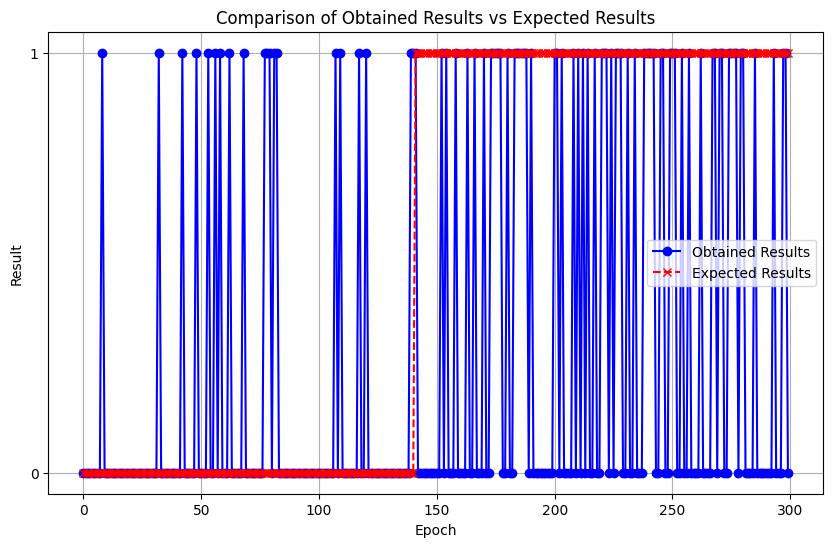

In [5]:
print(model)
# #720 (Control) - Salida 1
# dato0 = [7.417502636689077,198.70565298813403,24389.36288513361,4.790681389223984,289.3313577693062,366.3707236475444,18.415180455004304,87.99622277162433,3.3912406668716133] 
# #2867 - Salida 1
# dato1 = [1.130768886836288,266.7449592274032,9929.194809860886,6.011964238184745,352.1532144022425,542.8067817707314,10.974207361682431,65.782453044405,4.771443754534465] 
# #2869 - Salida 1
# dato2 = [7.1252110755305536,209.7467711974657,16701.56597534472,7.458741450053704,320.50094487053195,404.7045963253844,18.9527967341603,92.34737526315509,3.9080753459125]
# #2871 - Salida 0
# dato3 = [7.171223722909929,199.16017530273533,13163.031278326584,5.762522398067345,351.2781335939347,436.6024359703054,19.10315199881154,52.57745108743676,2.2090917998705097]
# input_data = np.array([dato0,dato1,dato2,dato3])
input_data = np.array(variable)

training_df = pd.read_csv('Training Records.csv')
testing_df = pd.read_csv('Test Records.csv')

scale_data= training_df[['ph', 'Hardness', 'Solids','Chloramines','Sulfate','Conductivity', 'Organic_carbon','Trihalomethanes','Turbidity']]

# Escalado de entradas
scaler = StandardScaler()
scaler.fit(scale_data)

input_data = testing_df[['ph', 'Hardness', 'Solids','Chloramines','Sulfate','Conductivity', 'Organic_carbon','Trihalomethanes','Turbidity']].to_numpy()
input_data_scaled = scaler.transform(input_data) 

# Predicción
resultado = model.predict(input_data_scaled)
resultado_entero = (resultado>=0.5).astype(int)
#print (resultado_entero)

#-------

# Sample data for demonstration
#epochs = list(range(1, 11))
obtained_results = resultado_entero.tolist()
expected_results = testing_df['Potability'].tolist()

# Create a DataFrame
data = {
    'Obtained Results': obtained_results,
    'Expected Results': expected_results
}
df = pd.DataFrame(data)

# Display the DataFrame
df.to_json('resultados.json', orient='records', lines=True)


#--------------------



#------
# Sample data for demonstration
epochs = list(range(0, 300))
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, obtained_results, marker='o', linestyle='-', color='b', label='Obtained Results')
plt.plot(epochs, expected_results, marker='x', linestyle='--', color='r', label='Expected Results')
plt.title('Comparison of Obtained Results vs Expected Results')
plt.xlabel('Epoch')
plt.ylabel('Result')
plt.yticks([0, 1])  # Ensure the y-axis only shows 0 and 1
plt.legend()
plt.grid(True)
plt.show()